# Dollar Price Prediction

Importing Libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
# Loading data from a csv
usd_pkr = pd.read_csv('Datasets/PKR _ US$ Exchange Rates.csv')
petrol_price = pd.read_csv('Datasets/Petrol Price.csv')

In [5]:
# Petrol Price
petrol_price.head()

,Weekly,Islamabad,Rawalpindi,Gujranwala,Sialkot,Lahore,Faisalabad,Sargodha,Multan,Bahawalpur,Karachi,Hyderabad,Sukkur,Larkana,Peshawar,Bannu,Quetta,Khuzdar,Pakistan
0,26-Jul-2023,253.73,253.73,253.8,253.91,253.74,253.7,253.98,253.76,254.25,253.74,254.88,253.8,254.03,253.80,255.2,253.6,253.75,253.96
1,20-Jul-2023,253.73,253.73,253.8,253.91,253.74,253.7,253.98,253.76,254.25,253.74,254.88,253.8,254.03,253.80,255.2,253.6,253.75,253.96
2,13-Jul-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89
3,06-Jul-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89
4,22-Jun-2023,262.75,262.76,262.8,262.90,262.78,262.7,262.98,262.79,263.23,262.74,263.87,262.8,263.10,262.75,262.8,262.6,262.79,262.89


In [6]:
# USD - PKR
usd_pkr.head()

,Date,US$
0,03-Aug-2023,287.2019
1,02-Aug-2023,289.3818
2,01-Aug-2023,287.5424
3,31-Jul-2023,286.6416
4,27-Jul-2023,286.4521


In [7]:
# Merging datasets with required values
# Fixing the date problem
usd_pkr["Date"] = pd.to_datetime(usd_pkr['Date'])
petrol_price['Weekly'] = pd.to_datetime(petrol_price['Weekly'])

usd_pkr["Petrol_Price"] = usd_pkr["Date"].apply(lambda date: petrol_price.loc[petrol_price["Weekly"].sub(date).abs().idxmin(), "Karachi"])
usd_pkr['Petrol_Price'][:3] = 273.95

petrol_price_pred = pd.DataFrame(usd_pkr)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6160\507822239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_pkr['Petrol_Price'][:3] = 273.95


In [8]:
# Merged Data Frame
petrol_price_pred.head()

,Date,US$,Petrol_Price
0,2023-08-03,287.2019,273.95
1,2023-08-02,289.3818,273.95
2,2023-08-01,287.5424,273.95
3,2023-07-31,286.6416,253.74
4,2023-07-27,286.4521,253.74


In [9]:
# Checking the info
petrol_price_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1979 non-null   datetime64[ns]
 1   US$           1979 non-null   float64       
 2   Petrol_Price  1979 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 46.5 KB


In [63]:
# Checking missing values
petrol_price_pred.isnull().sum()

Date            0
US$             0
Petrol_Price    0
dtype: int64

In [10]:
# Checking the statistics
petrol_price_pred.describe()

,US$,Petrol_Price
count,1979.000000,1979.000000
mean,151.339956,116.960045
std,48.684358,57.800388
min,101.702500,64.480000
25%,105.397800,74.940000
50%,153.331800,99.360000
75%,167.347050,118.590000
max,298.931800,282.790000


Correlation

1.   Positive Correlation
2.   Negative Correlation



<AxesSubplot:>

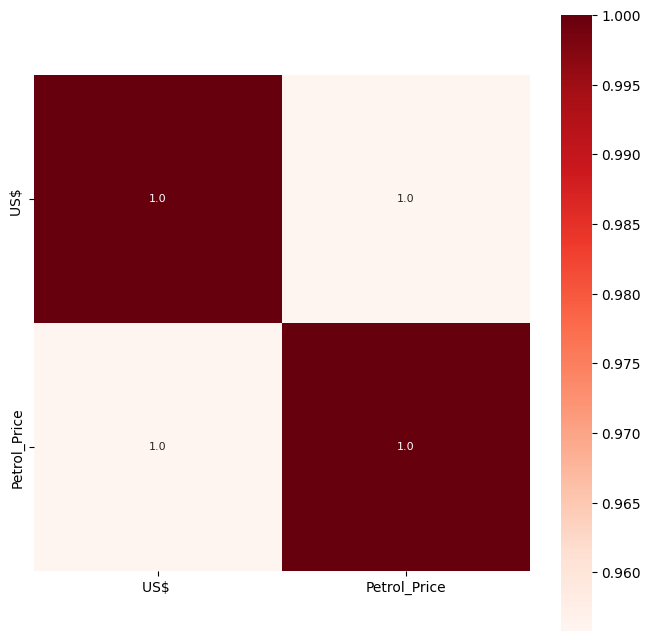

In [11]:
# Finding the correlation
correlation = petrol_price_pred.corr()

# constructing heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [12]:
# Correlation Values of Petrol
print(correlation['Petrol_Price'])

US$             0.955785
Petrol_Price    1.000000
Name: Petrol_Price, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_6160\2192971558.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(petrol_price_pred['Petrol_Price'], color='Red')


<AxesSubplot:xlabel='Petrol_Price', ylabel='Density'>

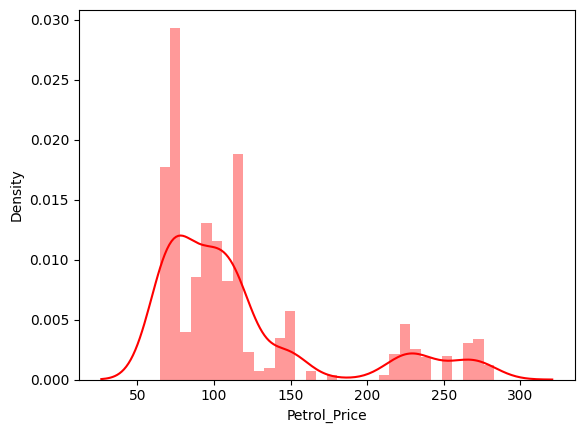

In [20]:
# Checking the distribution
sns.distplot(petrol_price_pred['Petrol_Price'], color='Red')

Splitting the Features and Targets

In [13]:
X = petrol_price_pred.drop(['Date', 'Petrol_Price'], axis=1)
Y = petrol_price_pred['Petrol_Price']

print(X, Y)

          US$ 
0     287.2019
1     289.3818
2     287.5424
3     286.6416
4     286.4521
...        ...
1974  101.7589
1975  101.7809
1976  101.7910
1977  101.7474
1978  101.7587

[1979 rows x 1 columns] 0       273.95
1       273.95
2       273.95
3       253.74
4       253.74
         ...  
1974     78.06
1975     78.06
1976     78.06
1977     78.06
1978     78.06
Name: Petrol_Price, Length: 1979, dtype: float64


Splitting into training and test data

In [14]:
# Training Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [15]:
# Prediction on test data
test_data_pred = regressor.predict(X_test)
test_data_pred

array([ 71.4404    , 116.2226    ,  66.1038    , 113.76      ,
       115.2654    , 110.6473    ,  88.4243    , 113.4287    ,
        76.4211    ,  71.59      ,  98.887     , 123.4036    ,
        66.6686    ,  70.2807    , 115.1525    , 108.519     ,
        72.706     ,  74.6909    ,  74.7705    , 113.2871    ,
        76.50350833,  99.7044    , 154.715     , 115.551     ,
        70.05796697,  76.1071    , 110.2064    ,  87.17488   ,
        76.44136548,  76.3399    , 111.7454    ,  65.54723667,
        93.4628    ,  77.44833333,  91.7942    , 116.327     ,
       150.36      ,  99.836     , 109.0821    ,  93.146     ,
        77.89      , 272.75      ,  73.3143    ,  94.3634    ,
        71.3       , 112.489     ,  87.6508    , 112.2485    ,
        71.4872    , 270.5196    , 127.9351    ,  95.68      ,
        76.58913333,  72.0449    ,  70.6772    , 272.75      ,
        84.6916    ,  72.9573    , 100.0003    , 103.6824    ,
        87.993     , 112.9661    ,  88.14      , 141.81

In [71]:
# R-squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print('R-squared error: ', error_score)

R-squared error:  0.977980926330471


Comparing the actual values with predicted values in a Plot

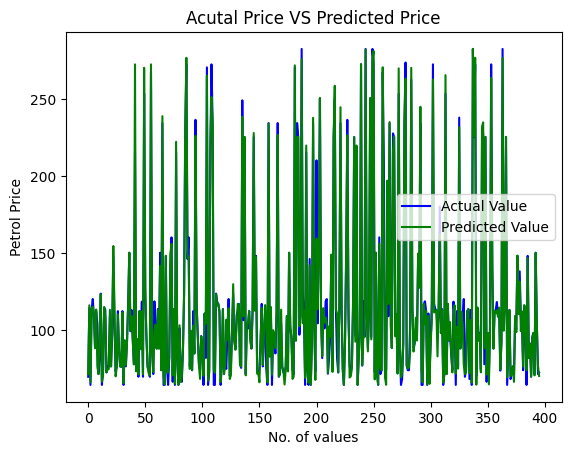

In [16]:
# Converting to a list
Y_test = list(Y_test)

# Time to plot
plt.plot(Y_test, color='Blue', label='Actual Value')
plt.plot(test_data_pred, color='Green', label='Predicted Value')
plt.title('Acutal Price VS Predicted Price')
plt.xlabel('No. of values')
plt.ylabel('Petrol Price')
plt.legend()
plt.show()